In [40]:
%matplotlib inline

import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

DATA_PATH = '/Users/vupham/data/quandl/data_nasdaq'

In [41]:
files = sorted(glob.glob(DATA_PATH + '/*.csv'))
all_data = None
for p in files:
    # print p
    stock_name = os.path.splitext(os.path.split(p)[1])[0]
    
    df = pd.read_csv(p)[['Date', 'Close']].rename(columns={'Close': 'Close_' + stock_name})
    if all_data is None:
        all_data = df
    else:
        all_data = all_data.merge(df, how='outer', on='Date')

In [42]:
all_data = all_data.sort_values(by='Date').set_index('Date')
all_data.iloc[:10, :]

,Close_YAHOO_AAL,Close_YAHOO_AAME,Close_YAHOO_AAOI,Close_YAHOO_AAON,Close_YAHOO_AAPL,Close_YAHOO_AAWW,Close_YAHOO_ABAX,Close_YAHOO_ABCB,Close_YAHOO_ABCD,Close_YAHOO_ABCO,...,Close_YAHOO_ZEUS,Close_YAHOO_ZGNX,Close_YAHOO_ZHNE,Close_YAHOO_ZION,Close_YAHOO_ZIOP,Close_YAHOO_ZIXI,Close_YAHOO_ZLTQ,Close_YAHOO_ZN,Close_YAHOO_ZNGA,Close_YAHOO_ZUMZ
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-02,13.32,1.57,NaN,18.780018,194.840000,52.599998,34.779999,16.000038,NaN,62.900002,...,32.200001,NaN,1.14,45.290001,3.48,4.40,NaN,6.70,NaN,22.200001
2008-01-03,12.72,1.51,NaN,18.009978,194.930002,52.939999,35.759998,15.120041,NaN,62.160000,...,33.020000,NaN,1.19,44.380001,3.54,4.38,NaN,6.70,NaN,20.280001
2008-01-04,12.41,1.57,NaN,17.619997,180.049995,52.020000,33.270000,14.440035,NaN,61.180000,...,31.010000,NaN,1.16,42.400002,3.58,4.17,NaN,6.60,NaN,18.650000
2008-01-07,12.23,1.51,NaN,18.279978,177.639994,51.919998,31.950001,15.220036,NaN,63.490002,...,29.900000,NaN,1.12,43.279999,3.25,3.72,NaN,6.53,NaN,16.940001
2008-01-08,11.01,1.45,NaN,17.540010,171.249994,50.000000,32.049999,14.650031,NaN,63.570000,...,29.670000,NaN,1.11,41.759998,3.27,3.71,NaN,6.45,NaN,16.309999
2008-01-09,10.89,1.64,NaN,18.120003,179.399994,48.099998,32.540001,14.790032,NaN,63.450001,...,29.420000,NaN,1.05,41.849998,3.16,3.38,NaN,6.55,NaN,17.480000
2008-01-10,12.55,1.72,NaN,17.950005,178.020002,49.970001,35.320000,14.810039,NaN,63.950001,...,30.450001,NaN,1.04,43.730000,3.50,3.60,NaN,6.55,NaN,17.559999
2008-01-11,11.89,1.45,NaN,16.800007,172.690001,49.310001,36.509998,14.190035,NaN,62.599998,...,29.330000,NaN,1.03,43.980000,3.50,3.45,NaN,6.50,NaN,16.889999


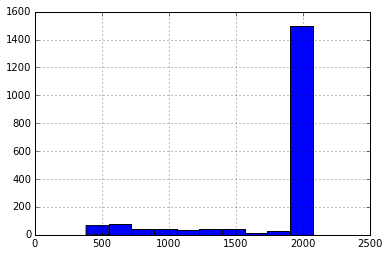

In [43]:
all_data.count().hist()

In [44]:
print len(all_data), len(all_data.columns), sum(all_data.count() >= 2000)
counts = all_data.count()
filtered_data = all_data.loc[:, counts.index[counts >= 2000].tolist()].sort_index()
print len(filtered_data), len(filtered_data.columns)
filtered_data.iloc[:10, :]

2081 1880 1486
2081 1486


,Close_YAHOO_AAL,Close_YAHOO_AAME,Close_YAHOO_AAON,Close_YAHOO_AAPL,Close_YAHOO_AAWW,Close_YAHOO_ABAX,Close_YAHOO_ABCB,Close_YAHOO_ABCO,Close_YAHOO_ABIO,Close_YAHOO_ABMD,...,Close_YAHOO_YRCW,Close_YAHOO_ZAGG,Close_YAHOO_ZBRA,Close_YAHOO_ZEUS,Close_YAHOO_ZHNE,Close_YAHOO_ZION,Close_YAHOO_ZIOP,Close_YAHOO_ZIXI,Close_YAHOO_ZN,Close_YAHOO_ZUMZ
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-02,13.32,1.57,18.780018,194.840000,52.599998,34.779999,16.000038,62.900002,1.779288,15.25,...,15.04425,0.75,34.259998,32.200001,1.14,45.290001,3.48,4.40,6.70,22.200001
2008-01-03,12.72,1.51,18.009978,194.930002,52.939999,35.759998,15.120041,62.160000,1.849260,15.02,...,13.47450,0.75,33.930000,33.020000,1.19,44.380001,3.54,4.38,6.70,20.280001
2008-01-04,12.41,1.57,17.619997,180.049995,52.020000,33.270000,14.440035,61.180000,1.689324,14.48,...,12.30450,0.72,32.750000,31.010000,1.16,42.400002,3.58,4.17,6.60,18.650000
2008-01-07,12.23,1.51,18.279978,177.639994,51.919998,31.950001,15.220036,63.490002,1.789284,14.74,...,13.71825,0.73,32.820000,29.900000,1.12,43.279999,3.25,3.72,6.53,16.940001
2008-01-08,11.01,1.45,17.540010,171.249994,50.000000,32.049999,14.650031,63.570000,1.759296,14.57,...,13.20150,0.70,32.520000,29.670000,1.11,41.759998,3.27,3.71,6.45,16.309999
2008-01-09,10.89,1.64,18.120003,179.399994,48.099998,32.540001,14.790032,63.450001,1.679328,14.98,...,13.93275,0.70,32.270000,29.420000,1.05,41.849998,3.16,3.38,6.55,17.480000
2008-01-10,12.55,1.72,17.950005,178.020002,49.970001,35.320000,14.810039,63.950001,1.729308,14.96,...,14.01075,0.70,32.000000,30.450001,1.04,43.730000,3.50,3.60,6.55,17.559999
2008-01-11,11.89,1.45,16.800007,172.690001,49.310001,36.509998,14.190035,62.599998,1.799280,14.75,...,13.52325,0.70,31.760000,29.330000,1.03,43.980000,3.50,3.45,6.50,16.889999


In [45]:
filled_data = filtered_data.fillna(axis=0, method='ffill').fillna(axis=0, method='bfill')
filled_data.iloc[:10, :]

,Close_YAHOO_AAL,Close_YAHOO_AAME,Close_YAHOO_AAON,Close_YAHOO_AAPL,Close_YAHOO_AAWW,Close_YAHOO_ABAX,Close_YAHOO_ABCB,Close_YAHOO_ABCO,Close_YAHOO_ABIO,Close_YAHOO_ABMD,...,Close_YAHOO_YRCW,Close_YAHOO_ZAGG,Close_YAHOO_ZBRA,Close_YAHOO_ZEUS,Close_YAHOO_ZHNE,Close_YAHOO_ZION,Close_YAHOO_ZIOP,Close_YAHOO_ZIXI,Close_YAHOO_ZN,Close_YAHOO_ZUMZ
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,13.32,1.57,18.780018,194.840000,52.599998,34.779999,16.000038,62.900002,1.779288,15.25,...,15.04425,0.75,34.259998,32.200001,1.14,45.290001,3.48,4.40,6.70,22.200001
2008-01-02,13.32,1.57,18.780018,194.840000,52.599998,34.779999,16.000038,62.900002,1.779288,15.25,...,15.04425,0.75,34.259998,32.200001,1.14,45.290001,3.48,4.40,6.70,22.200001
2008-01-03,12.72,1.51,18.009978,194.930002,52.939999,35.759998,15.120041,62.160000,1.849260,15.02,...,13.47450,0.75,33.930000,33.020000,1.19,44.380001,3.54,4.38,6.70,20.280001
2008-01-04,12.41,1.57,17.619997,180.049995,52.020000,33.270000,14.440035,61.180000,1.689324,14.48,...,12.30450,0.72,32.750000,31.010000,1.16,42.400002,3.58,4.17,6.60,18.650000
2008-01-07,12.23,1.51,18.279978,177.639994,51.919998,31.950001,15.220036,63.490002,1.789284,14.74,...,13.71825,0.73,32.820000,29.900000,1.12,43.279999,3.25,3.72,6.53,16.940001
2008-01-08,11.01,1.45,17.540010,171.249994,50.000000,32.049999,14.650031,63.570000,1.759296,14.57,...,13.20150,0.70,32.520000,29.670000,1.11,41.759998,3.27,3.71,6.45,16.309999
2008-01-09,10.89,1.64,18.120003,179.399994,48.099998,32.540001,14.790032,63.450001,1.679328,14.98,...,13.93275,0.70,32.270000,29.420000,1.05,41.849998,3.16,3.38,6.55,17.480000
2008-01-10,12.55,1.72,17.950005,178.020002,49.970001,35.320000,14.810039,63.950001,1.729308,14.96,...,14.01075,0.70,32.000000,30.450001,1.04,43.730000,3.50,3.60,6.55,17.559999
2008-01-11,11.89,1.45,16.800007,172.690001,49.310001,36.509998,14.190035,62.599998,1.799280,14.75,...,13.52325,0.70,31.760000,29.330000,1.03,43.980000,3.50,3.45,6.50,16.889999


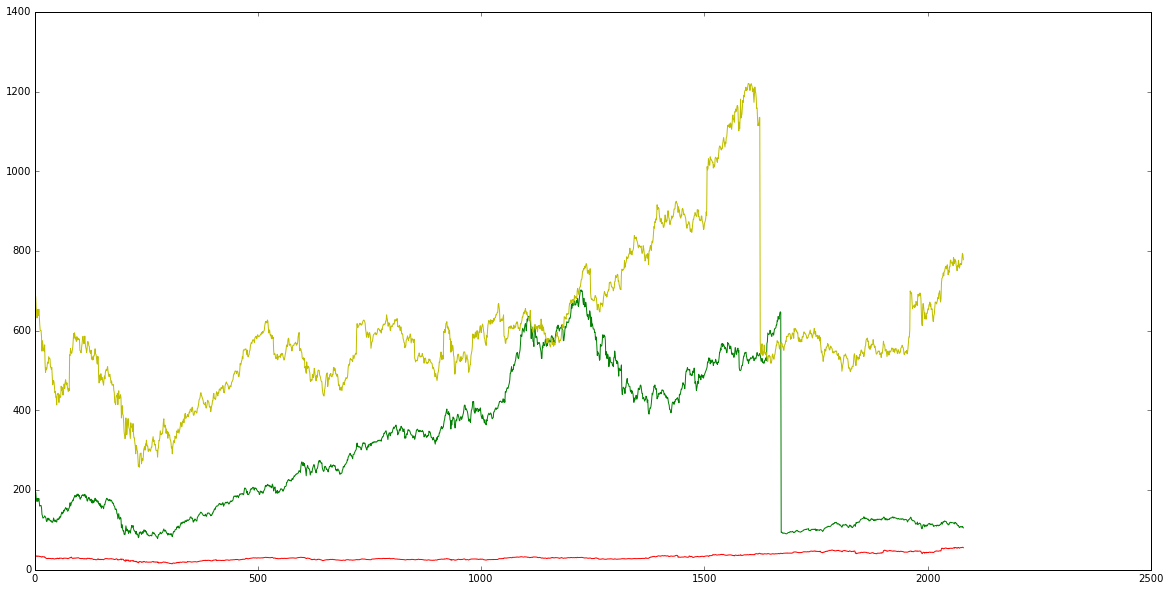

In [56]:
date_idx = range(0, len(filled_data))
plt.figure(figsize=(20,10))
plt.plot(date_idx, filled_data.Close_YAHOO_MSFT, linewidth=1, c='r')
plt.plot(date_idx, filled_data.Close_YAHOO_AAPL, linewidth=1, c='g')
plt.plot(date_idx, filled_data.Close_YAHOO_GOOGL, linewidth=1, c='y')
# plt.xticks(date_idx, filled_data.index.tolist())
plt.show()

In [60]:
filled_data.to_csv('nasdaq_north_us_processed.csv')

In [72]:
filled_transposed_data = filled_data.transpose().values
print filled_transposed_data.shape

# for t-SNE
import numpy as np
np.savetxt('nasdaq_north_us_transposed.csv', filled_transposed_data, delimiter='\t', fmt='%f')
np.savetxt('nasdaq_north_us_transposed_labels.csv', filled_data.transpose().index, fmt='%s')

(1486, 2081)


In [ ]:
python bhtsne.py -i ~/code/personal/misc/stock_crawler/nasdaq_north_us_transposed.csv -o ~/code/personal/misc/stock_crawler/nasdaq_north_us_transposed_tsne_2dims.csv -r 42 -d 2 -n 500 -p 10 -v
python bhtsne.py -i ~/code/personal/misc/stock_crawler/nasdaq_north_us_transposed.csv -o ~/code/personal/misc/stock_crawler/nasdaq_north_us_transposed_tsne_3dims.csv -r 42 -d 3 -n 500 -p 10 -v